In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Image Enhancement
## Gray Level Transformation
### Bitplane coding/slicing
#### Exercise 1: `256x256` image to 8-bit image
1. Extract the `8` bitplanes (0-bitplane(LSB)...7-bitplane(MSB)) of an 8-bit image.
2. From the bitplane get the original image.
    - Combining all the bitplanes should give us the original image.

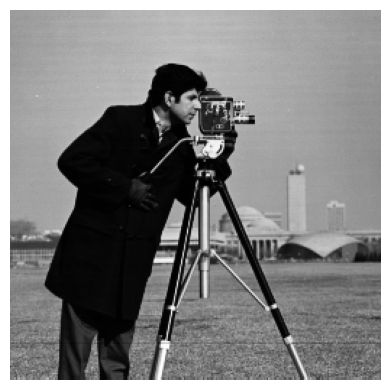

In [2]:
# 1. Read the input image
img = cv.imread("cameraman.tif", cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(8, 4))
plt.imshow(img, cmap="gray"), plt.axis("off")
plt.tight_layout()

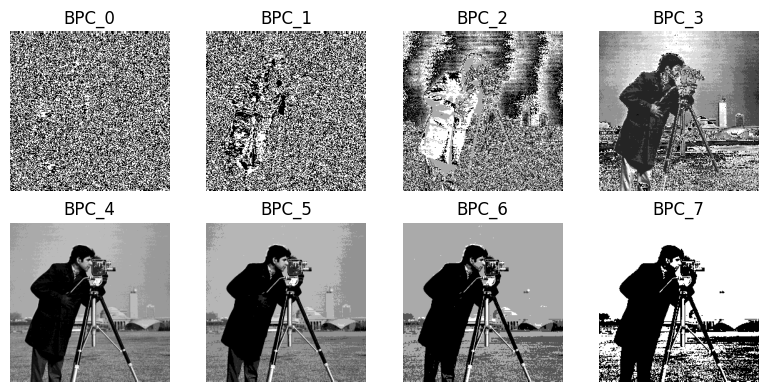

In [3]:
# 2. Extraction of 8 bitplanes using `modulo` function
bpc = [np.floor(img/2**i) % 2**i for i in range(8)]
bpc[0] = img % 2 # (??) 
plt.figure(figsize=(8, 4))
for i, bp in enumerate(bpc):
    plt.subplot(2, 4, i+1), plt.imshow(bp, cmap="gray"), plt.axis("off"), plt.title(f"BPC_{i}")
plt.tight_layout()

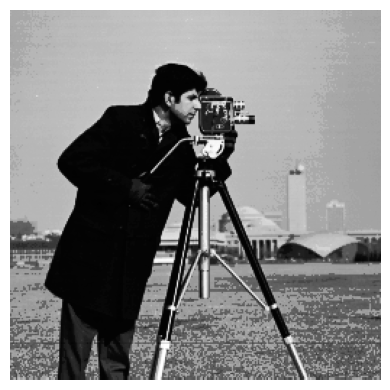

In [4]:
# 3. Reconstruction of the original from the 8 bitplanes.
img_re = sum([2**i * bp for i, bp in enumerate(bpc)])
plt.figure(figsize=(8, 4))
plt.imshow(img_re, cmap="gray"), plt.axis("off")
plt.tight_layout()

In [5]:
np.array_equal(img, img_re)

False

**Inference:** The reconstructed image is not exactly equal to the original image, because of the appx. done using the np.floor operation.

#### Exercise 2: Cameraman and Lena interweaving of bitplanes?

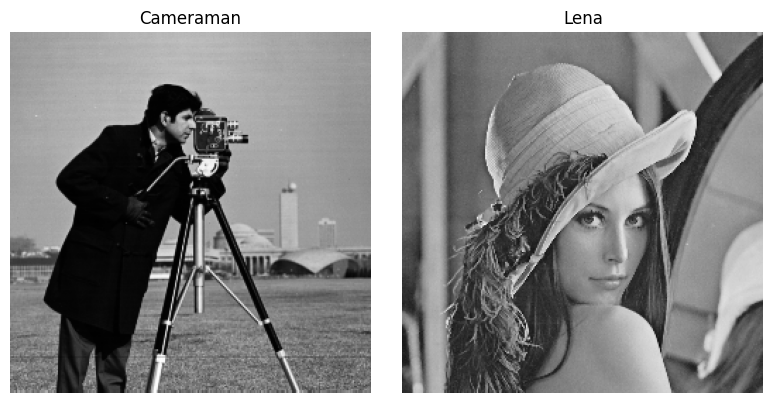

In [22]:
# 1. Read the input image
img_c = cv.imread("cameraman.tif", cv.IMREAD_GRAYSCALE)
img_l = cv.imread("lena.png", cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(img_c, cmap="gray"), plt.axis("off"), plt.title("Cameraman")
plt.subplot(122), plt.imshow(img_l, cmap="gray"), plt.axis("off"), plt.title("Lena")
plt.tight_layout()

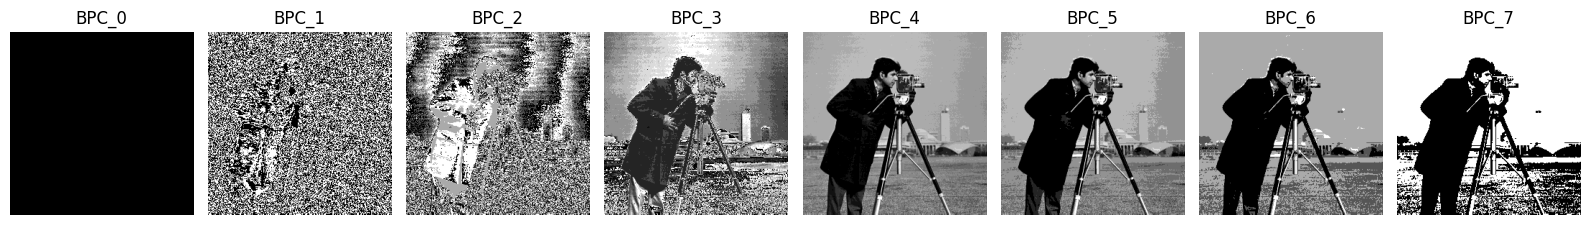

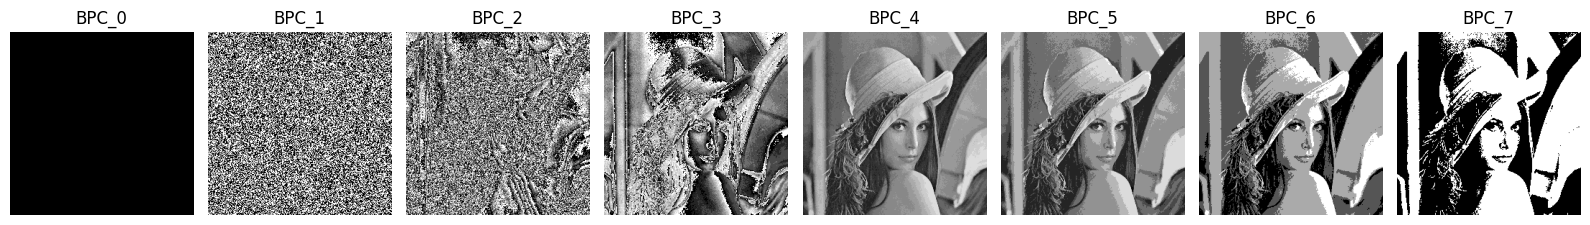

In [23]:
# 2. Extraction of 8 bitplanes using `modulo` function for Cameraman
bpc_c = np.array([np.floor(img_c/2**i) % 2**i for i in range(8)])
# bpc_c[0] = img_c % 2 # (??)
plt.figure(figsize=(16, 8))
for i, bp in enumerate(bpc_c):
    plt.subplot(1, 8, i+1), plt.imshow(bp, cmap="gray"), plt.axis("off"), plt.title(f"BPC_{i}")
plt.tight_layout()

# 2. Extraction of 8 bitplanes using `modulo` function for Lena
bpc_l = np.array([np.floor(img_l/2**i) % 2**i for i in range(8)])
# bpc_l[0] = img_l % 2 # (??)
plt.figure(figsize=(16, 8))
for i, bp in enumerate(bpc_l):
    plt.subplot(1, 8, i+1), plt.imshow(bp, cmap="gray"), plt.axis("off"), plt.title(f"BPC_{i}")
plt.tight_layout()

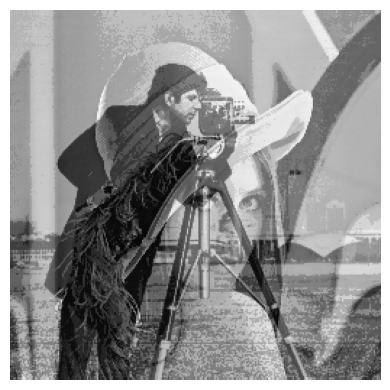

In [24]:
# 3. Reconstruction of an image as a combination of both
img_cl_re = np.zeros((256, 256))
for i in range(8):
    if i % 2:
        img_cl_re = np.add(img_cl_re, 2 ** i * bpc_c[i])
    else:
        img_cl_re = np.add(img_cl_re, 2 ** i * bpc_l[i])
    
plt.figure(figsize=(8, 4))
plt.imshow(img_cl_re, cmap="gray"), plt.axis("off")
plt.tight_layout()

## Unsharpening


Output = `α * (HPF) + β * (LPF) = α * (f(m, n) - g(m, n)) + β * (g(m, n))`
        

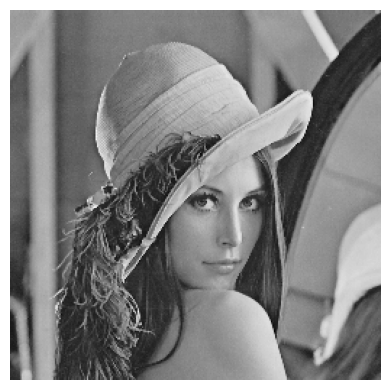

In [25]:
# 1. Read the input image: f(m, n)
f = cv.imread("lena.png", cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(8, 4))
plt.imshow(f, cmap="gray"), plt.axis("off")
plt.tight_layout()

In [26]:
# 2. Pass it thru LPF and get HPF
h = np.ones((3, 3)) / 9 # the lpf kernel
g = cv.filter2D(f, -1, h) # convolution to get lpf
α, β = 0.5, 0.5 # Turn these knobs to vary the output
z = α * (f - g) + β * g # α * (HPF) + β * (LPF) = α * (f(m, n) - g(m, n)) + β * (g(m, n))

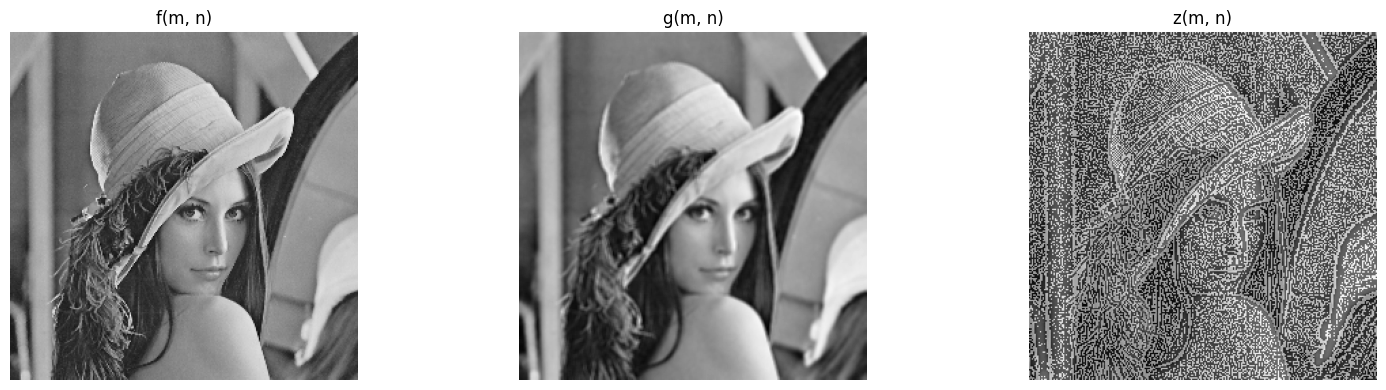

In [27]:
plt.figure(figsize=(16, 4))
plt.subplot(131), plt.imshow(f, cmap="gray"), plt.axis("off"), plt.title("f(m, n)")
plt.subplot(132), plt.imshow(g, cmap="gray"), plt.axis("off"), plt.title("g(m, n)")
plt.subplot(133), plt.imshow(z, cmap="gray"), plt.axis("off"), plt.title("z(m, n)")
plt.tight_layout()

## Logarithmic Transformation


>Output = y = c * log(1+x)  

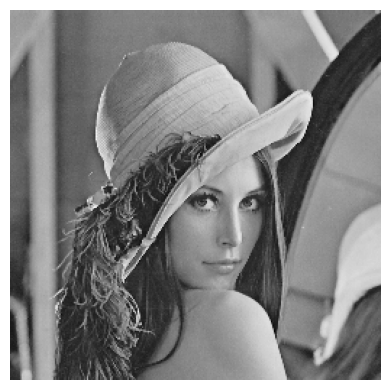

In [28]:
# 1. Read the input image
x = cv.imread("lena.png", cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(8, 4))
plt.imshow(x, cmap="gray"), plt.axis("off")
plt.tight_layout()

In [29]:
# 2. Cacluate c and apply transformation
c = 255 / np.log(255 + 1)
y = c * np.log(x + 1)
y_wo_c = np.log(x + 1)

/tmp/ipykernel_140487/2481019514.py:3: RuntimeWarning: divide by zero encountered in log
  y = c * np.log(x + 1)
/tmp/ipykernel_140487/2481019514.py:4: RuntimeWarning: divide by zero encountered in log
  y_wo_c = np.log(x + 1)


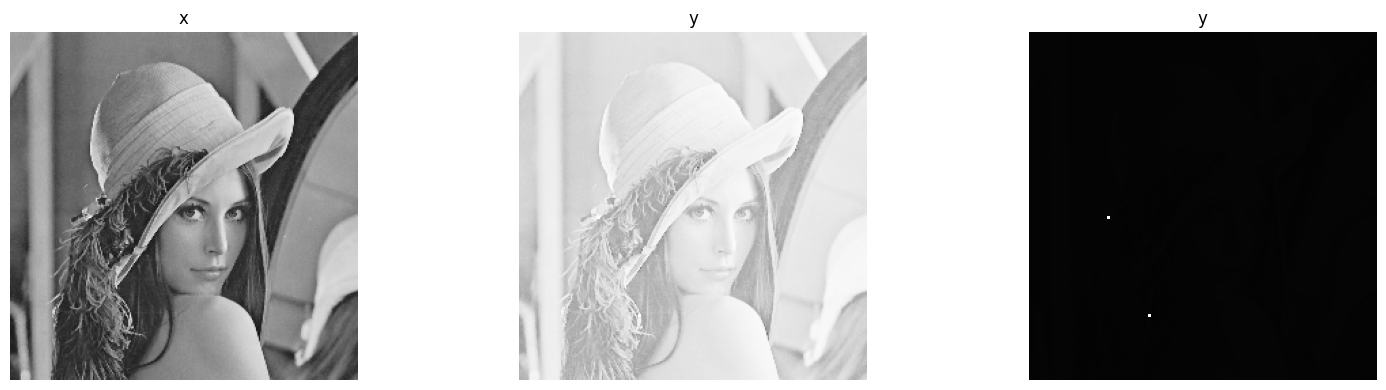

In [30]:
plt.figure(figsize=(16, 4))
plt.subplot(131), plt.imshow(x, cmap="gray", vmin=0, vmax=255), plt.axis("off"), plt.title("x")
plt.subplot(132), plt.imshow(y, cmap="gray", vmin=0, vmax=255), plt.axis("off"), plt.title("y")
plt.subplot(133), plt.imshow(y_wo_c, cmap="gray", vmin=0, vmax=255), plt.axis("off"), plt.title("y") # without a factor of `c`
plt.tight_layout()

## Gamma Correction Transformation


>Output: y = cx<sup>γ</sup>

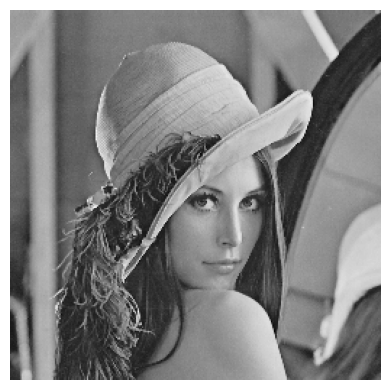

In [40]:
# 1. Read the input image
x = cv.imread("lena.png", cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(8, 4))
plt.imshow(x, cmap="gray"), plt.axis("off")
plt.tight_layout()

In [41]:
# 2. Cacluate c and apply transformation
c = 255 / np.log(255 + 1)
# c = 1
gamma = 1.5
y = c * (x ** gamma)

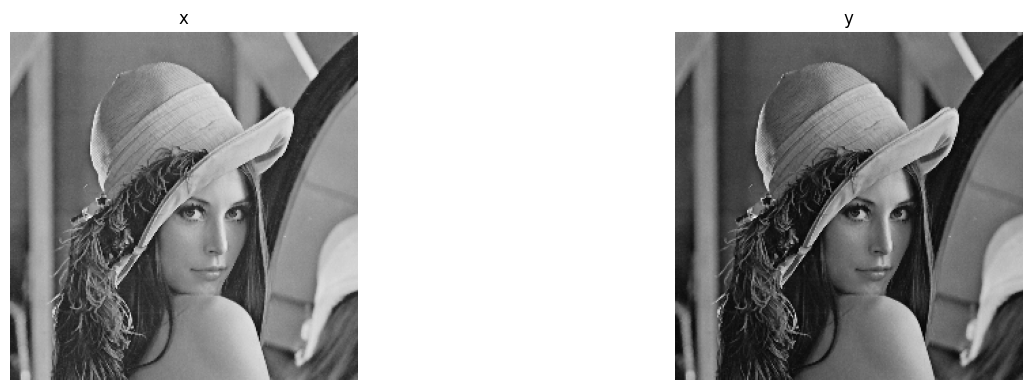

In [42]:
plt.figure(figsize=(16, 4))
plt.subplot(121), plt.imshow(x, cmap="gray"), plt.axis("off"), plt.title("x")
plt.subplot(122), plt.imshow(y, cmap="gray"), plt.axis("off"), plt.title("y")
plt.tight_layout()

## GL Slicing w/ and w/o background

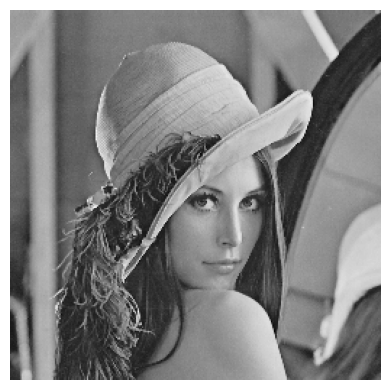

In [51]:
# 1. Read the input image
x = cv.imread("lena.png", cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(8, 4))
plt.imshow(x, cmap="gray"), plt.axis("off")
plt.tight_layout()

In [56]:
# 2. Calculate c and apply transformation
T1, T2 = 100, 150

y1 = x.copy()
y2 = np.zeros((256, 256))

y1[(x > T1) & (x < T2)] = 255
y2[(x > T1) & (x < T2)] = 255

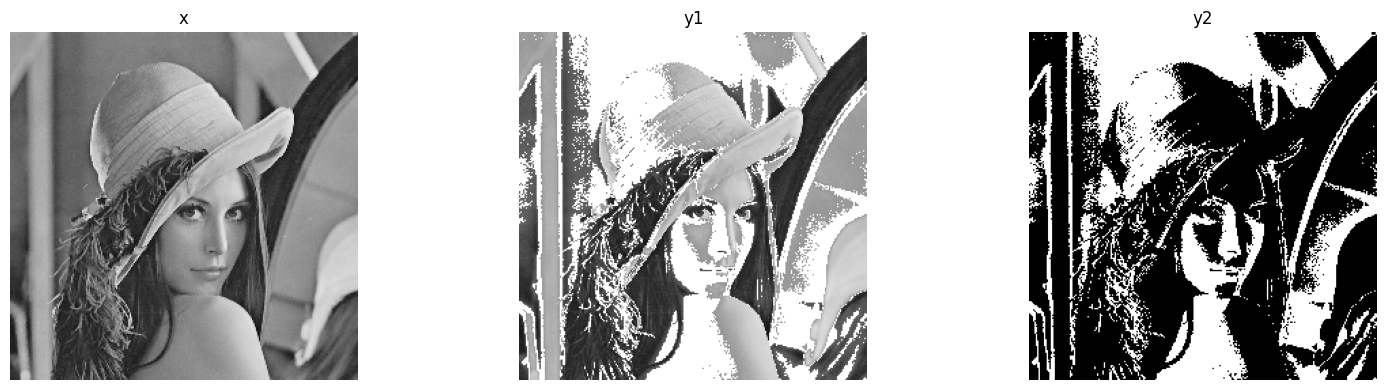

In [57]:
plt.figure(figsize=(16, 4))
plt.subplot(131), plt.imshow(x, cmap="gray"), plt.axis("off"), plt.title("x")
plt.subplot(132), plt.imshow(y1, cmap="gray"), plt.axis("off"), plt.title("y1")
plt.subplot(133), plt.imshow(y2, cmap="gray"), plt.axis("off"), plt.title("y2")
plt.tight_layout()